In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import SimpleITK as sitk
import scipy
import CTProjector.functions_collection as ff
import nibabel as nb
import HeadCT_motion_correction_PAR.motion_simulator.transformation as transform

import ct_projector.projector.cupy as ct_projector
import HeadCT_motion_correction_PAR.Data_processing as dp

[2.5266578 1.        1.       ]
(71, 234, 234)


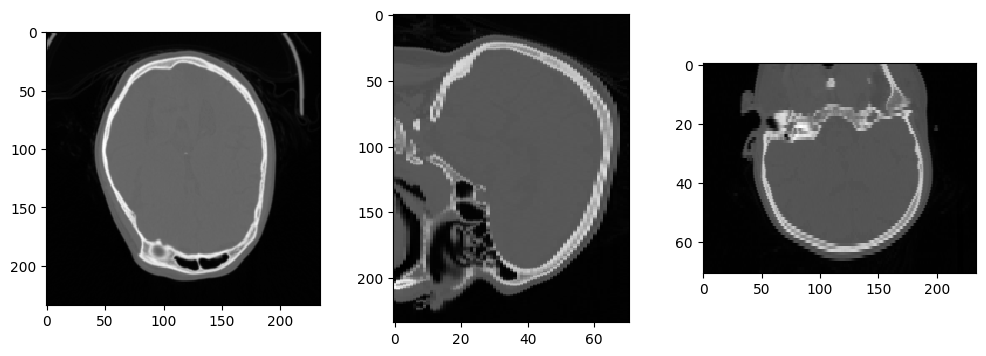

In [2]:
# load image
# filename = '/workspace/Documents/data/CT_motion/CT_images/example_CT_volume/patient_3/original/3.nii.gz'
filename = '/mnt/mount_zc_NAS/motion_correction/data/raw_data/nii-images/thin_slice/MO101701M000006/MO001A000007/img-nii-2.5/img.nii.gz'
ct = nb.load(filename)
spacing = ct.header.get_zooms()
img = ct.get_fdata()


img = np.rollaxis(img,-1,0)
spacing = np.array(spacing[::-1])

print(spacing)
print(img.shape)

plt.figure(figsize = (12,4))
plt.subplot(131); plt.imshow(img[img.shape[0]//2, ...].T, 'gray', aspect=spacing[1] / spacing[2])
plt.subplot(132); plt.imshow(img[:,img.shape[1]//2, :].T, 'gray', aspect=spacing[2] / spacing[0])
plt.subplot(133); plt.imshow(img[...,img.shape[2]//2], 'gray', aspect=spacing[0] / spacing[1])

Test the transformation code

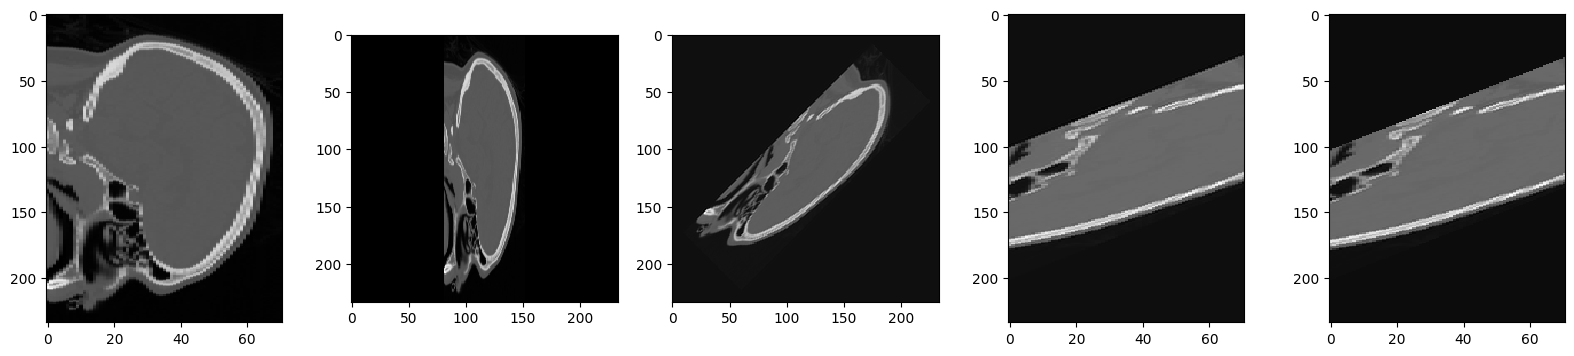

In [45]:
from scipy.ndimage import zoom

# define translation
t = [0,0,0]
# define rotation
r = [0,45,0]
r = [rr/180 * np.pi for rr in r]
# define scaling
s = [1,1,1]

# ONE
I = dp.crop_or_pad(img, [234,234,234], np.min(img))
translation,rotation,scale,transformation_matrix = transform.generate_transform_matrix(t,r,s, I.shape)
transformation_matrix = transform.transform_full_matrix_offset_center(transformation_matrix, I.shape)
img_t = transform.apply_affine_transform(I, transformation_matrix, order = 3, cval = np.min(img))
img_t_crop = dp.crop_or_pad(img_t,[71,234,234], np.min(img))

# TWO
translation,rotation,scale,transformation_matrix = transform.generate_transform_matrix(t,r,s, img.shape)
transformation_matrix = transform.transform_full_matrix_offset_center(transformation_matrix, img.shape)
img_t2 = transform.apply_affine_transform(img, transformation_matrix, order = 3, cval = np.min(img))



plt.figure(figsize = (20,4))
plt.subplot(151); plt.imshow(img[:,img_t.shape[1]//2,:].T, 'gray', aspect=spacing[2] / spacing[0])
plt.subplot(152); plt.imshow(I[:, img_t.shape[1]//2,:].T, 'gray')
plt.subplot(153); plt.imshow(img_t[:, img_t.shape[1]//2,:].T, 'gray')
plt.subplot(154); plt.imshow(img_t_crop[:,img_t.shape[1]//2,:].T, 'gray', aspect=spacing[2] / spacing[0])
plt.subplot(155); plt.imshow(img_t2[:,img_t.shape[1]//2,:].T, 'gray', aspect=spacing[2] / spacing[0])



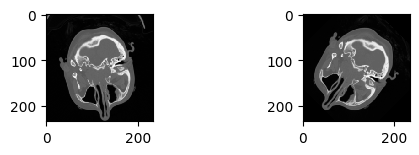

In [5]:
from scipy.ndimage import zoom

# define translation
t = [0,0,0]
# define rotation
r = [-45,0,0]
r = [rr/180 * np.pi for rr in r]
# define scaling
s = [1,1,1]

# TWO
translation,rotation,scale,transformation_matrix = transform.generate_transform_matrix(t,r,s, img.shape)
transformation_matrix = transform.transform_full_matrix_offset_center(transformation_matrix, img.shape)
img_t = transform.apply_affine_transform(img, transformation_matrix, order = 3, cval = np.min(img))



plt.figure(figsize = (8,4))
plt.subplot(151); plt.imshow(img[img_t.shape[0]//2 - 20,:,:].T, 'gray')
plt.subplot(153); plt.imshow(img_t[img_t.shape[0]//2-20,:,:].T, 'gray')